In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
reg_szn = pd.read_csv("../data/Stephen_Curry_Regularseason_Stats.csv")
twentyone = reg_szn[reg_szn['Season_year'] == '2020-2021']
by_szn = reg_szn.groupby('Season_year').mean()
w_l_converted = twentyone['Result'].eq('W').mul(1)
twentyone['Result'] = w_l_converted
twentyone

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
698,2020-2021,Regular,Sun 5/16,MEM,1,113,101,40.0,16-36,16,...,5,6,83.3,7,9,1,1,2,7,46
699,2020-2021,Regular,Tue 5/11,PHX,1,122,116,37.0,7-22,7,...,6,6,100.0,3,6,0,1,2,3,21
700,2020-2021,Regular,Mon 5/10,UTA,1,119,116,37.0,11-25,11,...,11,12,91.7,4,6,0,2,1,3,36
701,2020-2021,Regular,Sat 5/8,OKC,1,136,97,29.0,14-26,14,...,10,10,100.0,5,2,0,1,2,1,49
702,2020-2021,Regular,Thu 5/6,OKC,1,118,97,31.0,11-21,11,...,6,7,85.7,4,7,0,1,2,3,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2020-2021,Regular,Fri 1/1,POR,0,98,123,34.0,9-20,9,...,4,4,100.0,8,5,0,0,1,1,26
757,2020-2021,Regular,Tue 12/29,DET,1,116,106,35.0,9-17,9,...,8,8,100.0,5,6,0,2,5,8,31
758,2020-2021,Regular,Sun 12/27,CHI,1,129,128,36.0,11-25,11,...,9,9,100.0,2,6,2,2,1,4,36
759,2020-2021,Regular,Fri 12/25,MIL,0,99,138,29.0,6-17,6,...,5,5,100.0,4,6,0,1,2,2,19


In [4]:
reg_szn.columns

Index(['Season_year', 'Season_div', 'Date', 'OPP', 'Result', 'T Score',
       'O Score', 'MIN', 'FG', 'FGM', 'FGA', 'FG%', '3PT', '3PTM', '3PTA',
       '3P%', 'FT', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF',
       'TO', 'PTS'],
      dtype='object')

In [5]:
reg_szn['AST/TO'] = reg_szn['AST']/reg_szn['TO']
reg_szn['eFG%'] = (reg_szn['FGM'] + (0.5 * reg_szn['3PTM'])) / reg_szn['FGA'] * 100
reg_szn['TS%'] = (reg_szn['PTS'] / (2 * (reg_szn['FGA'] + (0.44 * reg_szn['FTA'])))) * 100
reg_szn

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,REB,AST,BLK,STL,PF,TO,PTS,AST/TO,eFG%,TS%
0,2009-2010,Regular,Wed 4/14,POR,W,122,116,48.0,13-25,13,...,9,8,1,2,0,2,42,4.000000,60.000000,69.352708
1,2009-2010,Regular,Tue 4/13,UTA,L,94,103,41.0,5-15,5,...,5,6,0,2,4,2,17,3.000000,36.666667,48.185941
2,2009-2010,Regular,Sun 4/11,OKC,W,120,117,35.0,9-16,9,...,7,7,0,1,2,5,25,1.400000,65.625000,67.060086
3,2009-2010,Regular,Sat 4/10,LAC,L,104,107,41.0,10-19,10,...,9,4,0,3,5,3,29,1.333333,65.789474,69.845857
4,2009-2010,Regular,Wed 4/7,MIN,W,116,107,44.0,12-22,12,...,8,14,0,7,4,4,27,3.500000,61.363636,61.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2020-2021,Regular,Fri 1/1,POR,L,98,123,34.0,9-20,9,...,8,5,0,0,1,1,26,5.000000,55.000000,59.742647
757,2020-2021,Regular,Tue 12/29,DET,W,116,106,35.0,9-17,9,...,5,6,0,2,5,8,31,0.750000,67.647059,75.536062
758,2020-2021,Regular,Sun 12/27,CHI,W,129,128,36.0,11-25,11,...,2,6,2,2,1,4,36,1.500000,54.000000,62.154696
759,2020-2021,Regular,Fri 12/25,MIL,L,99,138,29.0,6-17,6,...,4,6,0,1,2,2,19,3.000000,41.176471,49.479167


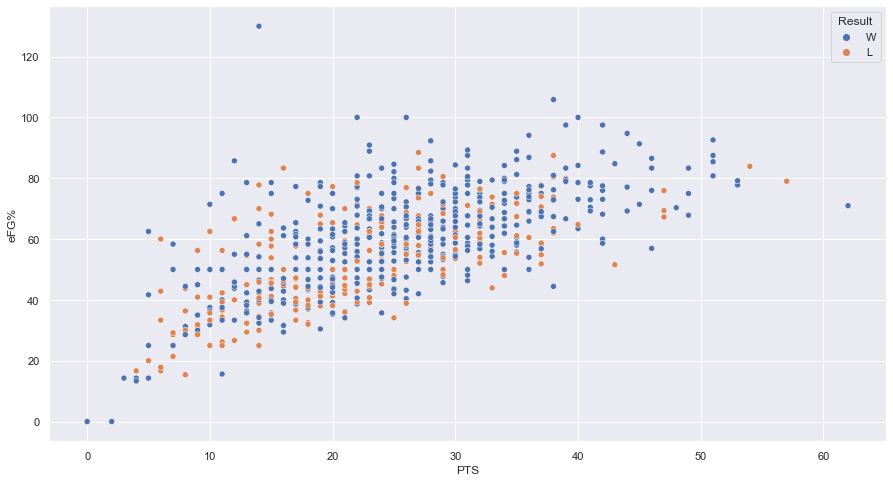

In [9]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=reg_szn, x='PTS', y='eFG%', hue='Result');

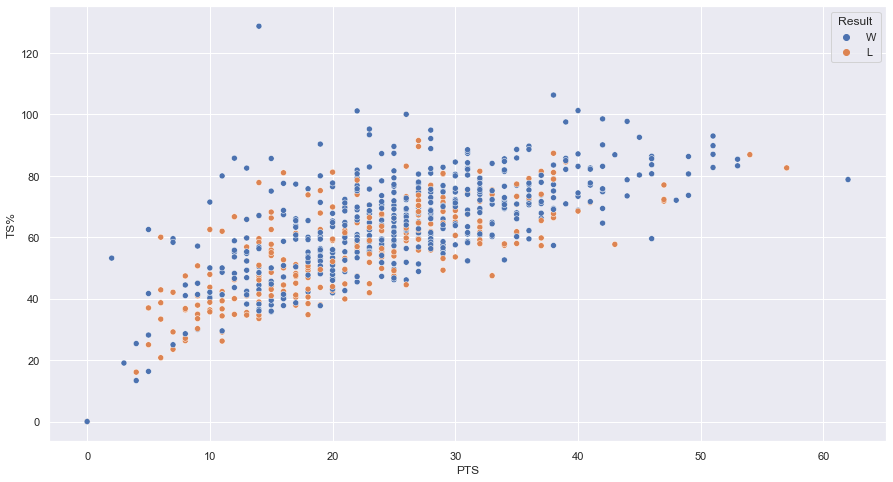

In [15]:
sns.scatterplot(data=reg_szn, x='PTS', y='TS%', hue='Result');

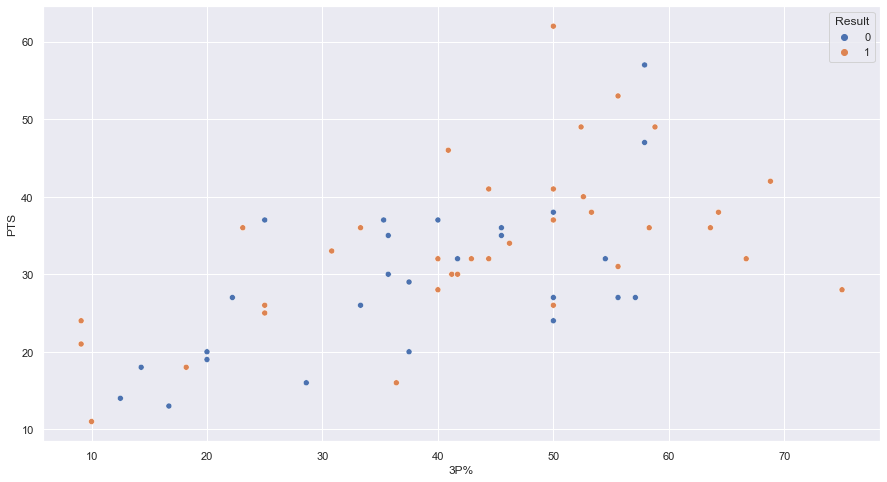

In [11]:
sns.scatterplot(data=twentyone, x='3P%', y='PTS', hue='Result');

In [ ]:
sns.regplot(x='FGM', y='PTS', data=twentyone)

In [ ]:
twentyone_numeric = twentyone.drop(labels=['Season_year','Season_div', 'Date','OPP', 'FG','3PT', 'FT','Result'],axis=1)
twentyone_numeric

In [ ]:
twentyone_num_normalized = (twentyone_numeric - twentyone_numeric.mean()) / twentyone_numeric.std()
twentyone_num_normalized['Result'] = w_l_converted
twentyone_num_normalized

In [ ]:
correlation = twentyone_num_normalized.corr()
sns.heatmap(correlation, cmap='viridis');

In [ ]:
post_szn = pd.read_csv("../data/Stephen_Curry_Postseason_Stats.csv").drop(labels='Season_div', axis=1)
post_szn_w_l_converted = post_szn['Result'].eq('W').mul(1)
post_szn['Result'] = post_szn_w_l_converted
post_szn.sort_values(by='3P%', ascending=False)


In [ ]:
post_szn_numeric = post_szn.select_dtypes([np.number])
post_szn_numeric_normalized = (post_szn_numeric - post_szn_numeric.mean()) / post_szn_numeric.std()
sns.heatmap(post_szn_numeric_normalized.corr(), cmap='viridis')
    

Text(0.5, 1.0, 'Stephen Curry Regular Season Points Distribution')

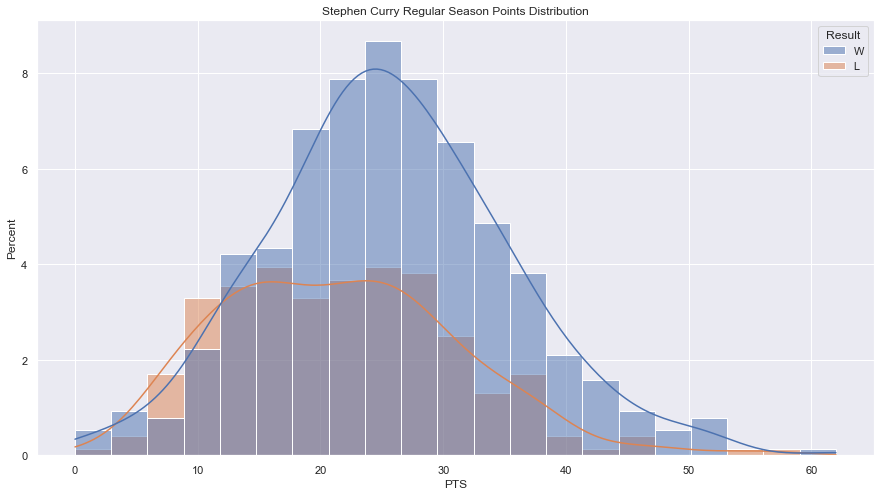

In [17]:
sns.histplot(data=reg_szn, x='PTS', stat='percent', hue='Result', kde=True);
plt.title('Stephen Curry Regular Season Points Distribution')

In [ ]:
sns.histplot(data=post_szn, x='PTS', stat='percent', hue='Result', kde=True, binwidth=2);
plt.title('Post Season Points Distribution');

In [ ]:
twentyone_sixteen = reg_szn[(reg_szn['Season_year'] == '2020-2021') | (reg_szn['Season_year'] == '2015-2016')]
twentyone_sixteen.head()

In [ ]:
sns.histplot(data=twentyone_sixteen, x='PTS', stat='percent', kde=True, hue='Season_year', multiple='stack');
plt.xlabel('Points')
plt.title('Points distribution 2020-2021 vs 2015-2016');

In [ ]:
reg_szn.columns

In [ ]:
sns.histplot(data=reg_szn, x='T Score', stat='percent', hue='Result', kde=True);
plt.title('Team Score Distribution during the Regular Season');

In [ ]:
sns.histplot(data=reg_szn, x='O Score', stat='percent', hue='Result', kde=True, multiple='stack');
plt.title('Opponent Score Distribution during the Regular Season');

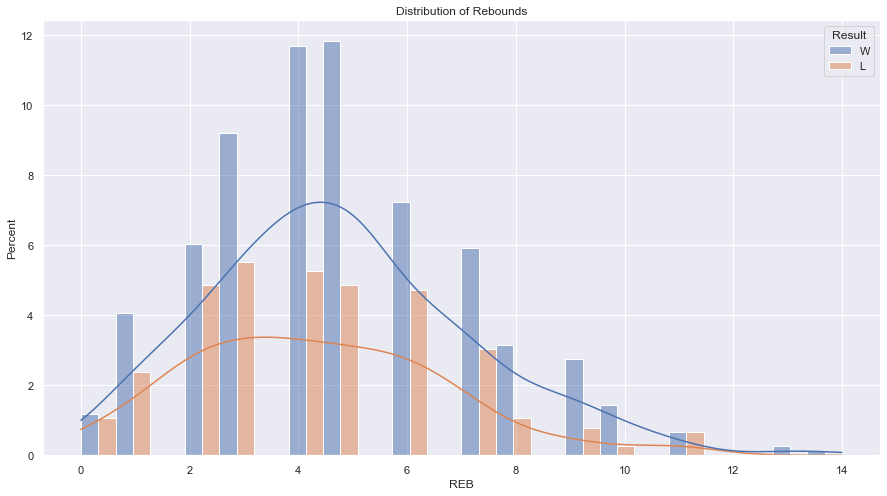

In [28]:
sns.histplot(data=reg_szn, x='REB', stat='percent', hue='Result', multiple='dodge', kde=True);
plt.title('Distribution of Rebounds');

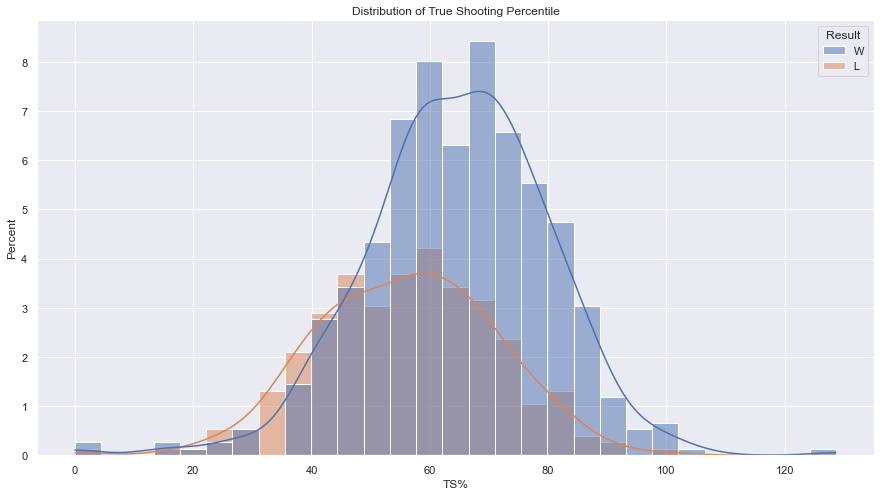

In [37]:
sns.histplot(data=reg_szn, x='TS%', hue='Result', stat='percent', kde=True);
plt.title('Distribution of True Shooting Percentile');